In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyzing Dataset

In [2]:
df_x = pd.read_csv('weightedX.csv')
df_y = pd.read_csv('weightedY.csv')
X = df_x.values
Y = df_y.values

In [3]:
print(X.shape)
print(Y.shape)


(99, 1)
(99, 1)


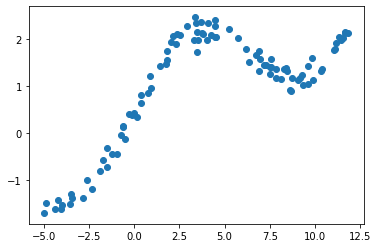

In [4]:
plt.scatter(X,Y)
plt.show()

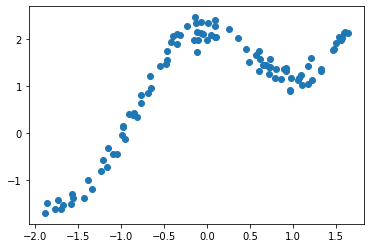

In [43]:
X = (X - X.mean())/X.std()   # Normalising data
plt.scatter(X,Y)
plt.show()

M = X.shape[0]

## Algorithm

In [44]:
def getW(query_point,X,tau):
    
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    
    return W


In [58]:
def predict(X,Y,query_points,tau):
    M = X.shape[0]
    ones = np.ones((M,1))
    
    X_ = np.hstack((X,ones))
    qx = np.mat([query_points,1])
    W = getW(qx,X_,tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))    #theta = `(X′WX)inv * X′WY`
    pred = np.dot(qx,theta)
    return pred,theta


In [60]:
pred,theta = predict(X,Y,1.0,0.1)

## Trying for different values of Tau

In [61]:
def plotPredicion(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        pred,theta = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

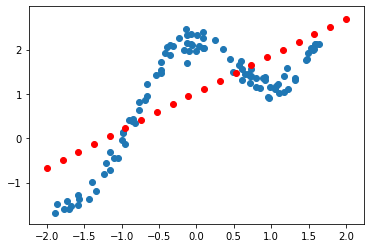

In [62]:
plotPredicion(10)

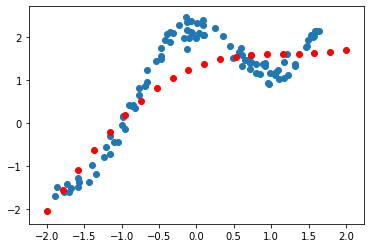

In [63]:
plotPredicion(1)

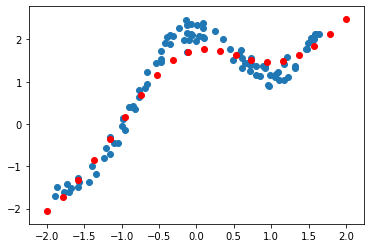

In [64]:
plotPredicion(0.5)

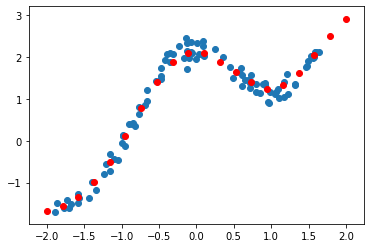

In [65]:
plotPredicion(0.2)

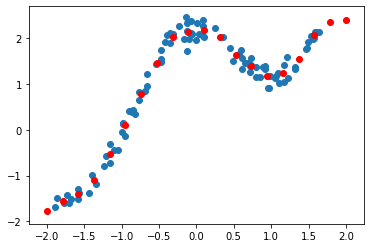

In [66]:
plotPredicion(0.09)